<a href="https://colab.research.google.com/github/Gnana212/project---E-COMMERCE-CUSTOMER-SEGMENTATION/blob/main/E_COMMERCE_CUSTOMER_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K MEANS CLUSTERING  
      
*    To cluster customers with similar interest. 






DATASET INFORMATION:

Input Variables:

Cust_ID -> Unique numbering for customers 

Gender -> Gender of the customer
 
Orders -> Number of orders placed by each customer in the past 

1)IMPORT PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

2)READ THE DATA

In [2]:
df = pd.read_excel("cust_data.xlsx")
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


3)DATA TYPES AND DIMENSIONS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [4]:
df.dtypes.value_counts()

int64     37
object     1
dtype: int64

In [5]:
df.shape


(30000, 38)

In [6]:
df.describe()


,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [7]:
df.describe(include='object')


,Gender
count,27276
unique,2
top,F
freq,22054


4)MISSING VALUES TREATMENT

In [8]:
def missing(data):
     a = data.isnull().sum().sort_values(ascending=False)
     b =(data.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
     c =pd.concat([a,b],axis=1,keys=["Total","Percentage"])
     return c

In [9]:
missing(df)

,Total,Percentage
Gender,2724,9.08
Cust_ID,0,0.00
LG,0,0.00
Pop Chips,0,0.00
Juniper,0,0.00
Huawei,0,0.00
Compaq,0,0.00
IBM,0,0.00
Burberry,0,0.00
Mi,0,0.00


Text(0.5, 1.0, 'heatmap - missing values')

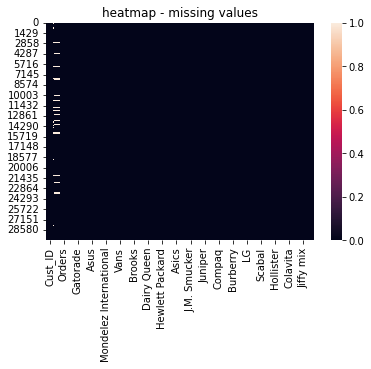

In [10]:
sns.heatmap(df.isnull(),cbar=True)
plt.title('heatmap - missing values')

In [11]:
df['Gender'].unique()


array(['M', 'F', nan], dtype=object)

In [12]:
df['Gender'].value_counts()


F    22054
M     5222
Name: Gender, dtype: int64

In [13]:
df['Gender'].fillna('Other', inplace = True)


5)DUMMY CREATION

In [14]:
df1 = pd.get_dummies(df, drop_first=True)


In [15]:
df1.columns

Index(['Cust_ID', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_M',
       'Gender_Other'],
      dtype='object')

In [16]:
df1.shape


(30000, 39)

In [17]:
df1.isnull().sum()


Cust_ID                   0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix           

In [18]:
data=pd.get_dummies(df,columns=["Gender"])


In [19]:
data.head()


,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,Gender_Other
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


6)VISUALIZATION

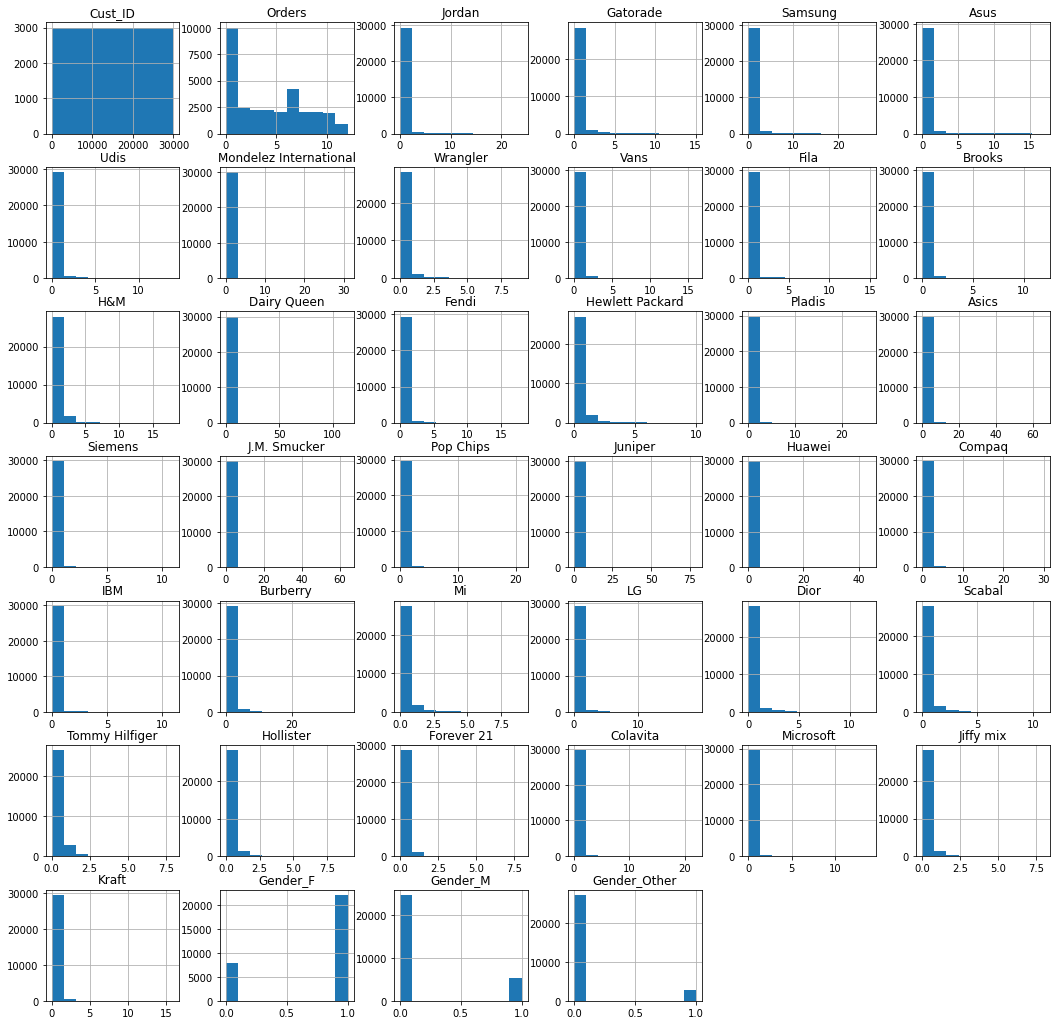

In [20]:
fig=data.hist(figsize=(18,18))


7)K MEANS CLUSTERING

In [21]:
df1.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.25,0.5,0.75,0.95,0.96,0.97,0.98,0.99]).T


,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,95%,96%,97%,98%,99%,max
Cust_ID,30000.0,15000.500000,8660.398374,1.0,300.99,600.98,900.97,1200.96,1500.95,7500.75,15000.5,22500.25,28500.05,28800.04,29100.03,29400.02,29700.01,30000.0
Orders,30000.0,4.169800,3.590311,0.0,0.00,0.00,0.00,0.00,0.00,1.00,4.0,7.00,10.00,10.00,11.00,11.00,12.00,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,2.00,2.00,2.00,3.00,4.00,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,2.00,2.00,2.00,2.00,3.00,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,2.00,2.00,3.00,5.00,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,2.00,2.00,4.00,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,1.00,2.00,3.00,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,1.00,2.00,2.00,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,1.00,2.00,3.00,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,1.00,1.00,2.00,2.00,16.0


In [22]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    return x

In [23]:
df2 = df1.apply(lambda x : outlier_capping(x))


In [24]:
df2.shape


(30000, 39)

In [25]:
df2.columns


Index(['Cust_ID', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_M',
       'Gender_Other'],
      dtype='object')

In [26]:
x = ['Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft']
df3 = df2[x]

In [27]:
def Kmeans(data,k, gap, verbose=True, g=True):
    wcs=[]
    clust=[]
    for i in range(1,k+1, gap):
        clust.append(i)
        km=KMeans(n_clusters=i)
        km_result=km.fit(data)
        k1=km_result.inertia_
        wcs.append(k1)
        if verbose:
            print(f"for cluster {i} ; WCSS = {round(k1, 2)}")
    if g:
        plt.plot(clust, wcs, label="within cluster sum of sqaure(wcss)")
        plt.xlabel("Clusters")
        plt.ylabel("Wcss")
        plt.legend()
        plt.show()
    return wcs, clust

for cluster 1 ; WCSS = 2248664324230.07
for cluster 2 ; WCSS = 561841850727.25
for cluster 3 ; WCSS = 249569728993.57
for cluster 4 ; WCSS = 140306341320.96
for cluster 5 ; WCSS = 89749815393.73
for cluster 6 ; WCSS = 62302951325.99
for cluster 7 ; WCSS = 45749434841.46
for cluster 8 ; WCSS = 35007229489.39
for cluster 9 ; WCSS = 27646627696.98
for cluster 10 ; WCSS = 22391188622.18


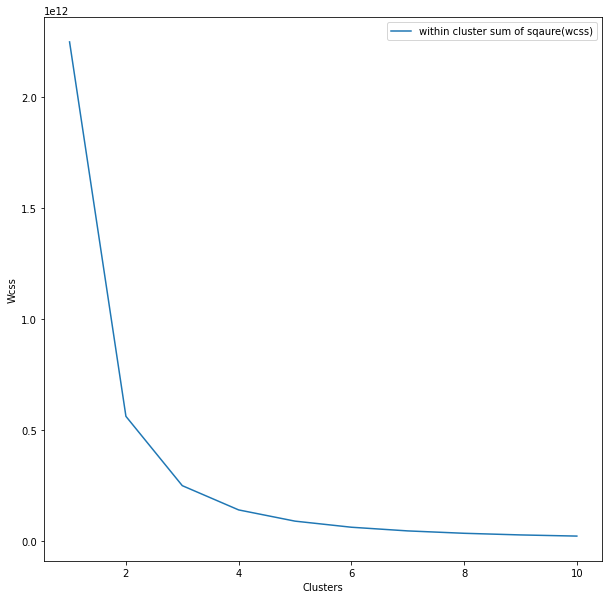

([2248664324230.0723,
  561841850727.2498,
  249569728993.56897,
  140306341320.9597,
  89749815393.7295,
  62302951325.98506,
  45749434841.46448,
  35007229489.388214,
  27646627696.97563,
  22391188622.181328],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [28]:
plt.figure(figsize = [10,10])
Kmeans(data=df2, k=10, gap=1, verbose=True)

cluster_2

In [29]:
km=KMeans(n_clusters=2)
km_result=km.fit(df2)

In [30]:
km_result.labels_
df2

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_M,Gender_Other
0,1.00,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,2.00,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,3.00,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0
3,4.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,5.00,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29700.01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
29996,29700.01,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
29997,29700.01,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
29998,29700.01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [31]:
df4=df2.copy()


In [32]:
df4["cluster2"]=km_result.labels_
df4.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_M,Gender_Other,cluster2
0,1.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
1,2.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,3.0,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,1
3,4.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,5.0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1,1


In [33]:
df4["cluster2"].value_counts()


0    15009
1    14991
Name: cluster2, dtype: int64

In [34]:
d2=df4.groupby(["cluster2"]).mean().T
d2.columns=["cluster_1", "cluster_2"]
d2.reset_index(inplace=True)
d2

,index,cluster_1,cluster_2
0,Cust_ID,22492.992005,7496.000000
1,Orders,4.252315,4.087186
2,Jordan,0.303351,0.202455
3,Gatorade,0.255713,0.217531
4,Samsung,0.241988,0.165032
5,Asus,0.172430,0.113802
6,Udis,0.151509,0.095791
7,Mondelez International,0.137384,0.113268
8,Wrangler,0.114731,0.078714
9,Vans,0.096542,0.079448


In [35]:
overall=pd.DataFrame(df2.describe().T["mean"])
overall.reset_index(inplace=True)
overall.columns=["index", "Overall_mean"]

In [36]:
final=overall.merge(d2, on="index", how="inner")


In [37]:
final

,index,Overall_mean,cluster_1,cluster_2
0,Cust_ID,14998.995100,22492.992005,7496.000000
1,Orders,4.169800,4.252315,4.087186
2,Jordan,0.252933,0.303351,0.202455
3,Gatorade,0.236633,0.255713,0.217531
4,Samsung,0.203533,0.241988,0.165032
5,Asus,0.143133,0.172430,0.113802
6,Udis,0.123667,0.151509,0.095791
7,Mondelez International,0.125333,0.137384,0.113268
8,Wrangler,0.096733,0.114731,0.078714
9,Vans,0.088000,0.096542,0.079448


SILHOUTTE SCORE

In [38]:
score1 = metrics.silhouette_score(df2, km_result.labels_)
print('Silhouette Score : % 0.3f' % score1)

Silhouette Score :  0.627


In [39]:
df4.columns


Index(['Cust_ID', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus', 'Udis',
       'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks', 'H&M',
       'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics', 'Siemens',
       'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq', 'IBM',
       'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger', 'Hollister',
       'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix', 'Kraft', 'Gender_M',
       'Gender_Other', 'cluster2'],
      dtype='object')

In [40]:
final.to_excel("Cluster_2.xlsx" )


clusters_3

In [41]:
km=KMeans(n_clusters=3)
km_result=km.fit(df2)

In [42]:
km_result.labels_


array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [43]:
df5=df2.copy()


In [44]:
df5["cluster3"]=km_result.labels_


In [45]:
df5["cluster3"].value_counts()


0    10016
1     9997
2     9987
Name: cluster3, dtype: int64

In [46]:
d3=df5.groupby(["cluster3"]).mean().T
d3.columns=["cluster_1", "cluster_2", "cluster_3"]
d3.reset_index(inplace=True)
d3

,index,cluster_1,cluster_2,cluster_3
0,Cust_ID,5008.500000,15015.000000,25002.479423
1,Orders,4.033646,4.166450,4.309703
2,Jordan,0.198383,0.240372,0.320216
3,Gatorade,0.218550,0.240372,0.251026
4,Samsung,0.152756,0.199560,0.258436
5,Asus,0.104932,0.146944,0.177631
6,Udis,0.087560,0.122737,0.160809
7,Mondelez International,0.097744,0.139042,0.139281
8,Wrangler,0.073283,0.099330,0.117653
9,Vans,0.084165,0.078924,0.100931


In [47]:
final2=overall.merge(d3, on="index", how="inner")
final2

,index,Overall_mean,cluster_1,cluster_2,cluster_3
0,Cust_ID,14998.995100,5008.500000,15015.000000,25002.479423
1,Orders,4.169800,4.033646,4.166450,4.309703
2,Jordan,0.252933,0.198383,0.240372,0.320216
3,Gatorade,0.236633,0.218550,0.240372,0.251026
4,Samsung,0.203533,0.152756,0.199560,0.258436
5,Asus,0.143133,0.104932,0.146944,0.177631
6,Udis,0.123667,0.087560,0.122737,0.160809
7,Mondelez International,0.125333,0.097744,0.139042,0.139281
8,Wrangler,0.096733,0.073283,0.099330,0.117653
9,Vans,0.088000,0.084165,0.078924,0.100931


SILHOUTTE SCORE

In [48]:
score2 = metrics.silhouette_score(df2, km_result.labels_)
print('Silhouette Score : % 0.3f' % score2)

Silhouette Score :  0.590


In [49]:
final2.to_excel("Cluster_3.xlsx" )


cluster_4

In [50]:
km=KMeans(n_clusters=4)
km_result=km.fit(df2)

In [51]:
km_result.labels_


array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [52]:
df6=df2.copy()


In [53]:
df6["cluster4"]=km_result.labels_


In [54]:
df6["cluster4"].value_counts()


2    7533
0    7513
3    7490
1    7464
Name: cluster4, dtype: int64

In [55]:
d4=df6.groupby(["cluster4"]).mean().T
d4.columns=["cluster_1", "cluster_2", "cluster_3", "cluster_4"]
d4.reset_index(inplace=True)
d4

,index,cluster_1,cluster_2,cluster_3,cluster_4
0,Cust_ID,18711.000000,3732.500000,26228.006770,11209.500000
1,Orders,4.226408,4.019427,4.281694,4.150334
2,Jordan,0.269799,0.184753,0.335988,0.220427
3,Gatorade,0.264342,0.210745,0.247710,0.223498
4,Samsung,0.214295,0.139469,0.269215,0.190521
5,Asus,0.170904,0.100616,0.174698,0.125901
6,Udis,0.135365,0.080922,0.167264,0.110681
7,Mondelez International,0.128976,0.097133,0.145759,0.129239
8,Wrangler,0.106482,0.066318,0.122395,0.091455
9,Vans,0.090909,0.083601,0.102350,0.075033


In [56]:
final3=overall.merge(d4, on="index", how="inner")
final3

,index,Overall_mean,cluster_1,cluster_2,cluster_3,cluster_4
0,Cust_ID,14998.995100,18711.000000,3732.500000,26228.006770,11209.500000
1,Orders,4.169800,4.226408,4.019427,4.281694,4.150334
2,Jordan,0.252933,0.269799,0.184753,0.335988,0.220427
3,Gatorade,0.236633,0.264342,0.210745,0.247710,0.223498
4,Samsung,0.203533,0.214295,0.139469,0.269215,0.190521
5,Asus,0.143133,0.170904,0.100616,0.174698,0.125901
6,Udis,0.123667,0.135365,0.080922,0.167264,0.110681
7,Mondelez International,0.125333,0.128976,0.097133,0.145759,0.129239
8,Wrangler,0.096733,0.106482,0.066318,0.122395,0.091455
9,Vans,0.088000,0.090909,0.083601,0.102350,0.075033


 Silhouette score 

In [57]:
score3 = metrics.silhouette_score(df2, km_result.labels_)
print('Silhouette Score : % 0.3f' % score3)

Silhouette Score :  0.572


In [58]:
final3.to_excel("Cluster_4.xlsx" )